In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reproducability
np.random.seed(0)

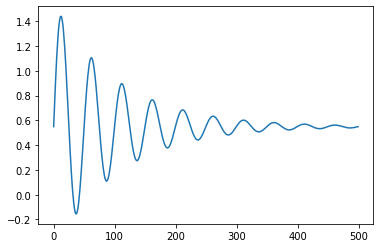

In [2]:
values = np.linspace(0, 10 * 2 * np.pi, num=500)
damping_factor = -0.075
#values = np.sin(values) * np.exp(damping_factor * values)
values = np.sin(values) * np.exp(damping_factor * values) + np.random.random()
plt.plot(values)

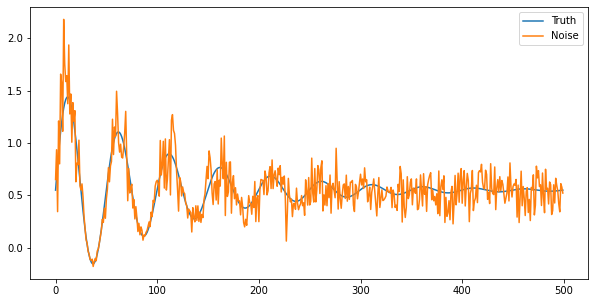

In [3]:
noisy_values = []
for value in values:
    #noisy_values.append(np.random.random() * value)
    # gaussian smearing of true values
    gauss = 0.25 * np.random.randn() + 1.
    noisy_values.append(gauss * value)
noisy_values = np.array(noisy_values)

fig, axs = plt.subplots(1, 1, figsize = (10, 5))
_ = axs.plot(values, label='Truth')
_ = axs.plot(noisy_values, label='Noise')
_ = axs.legend()

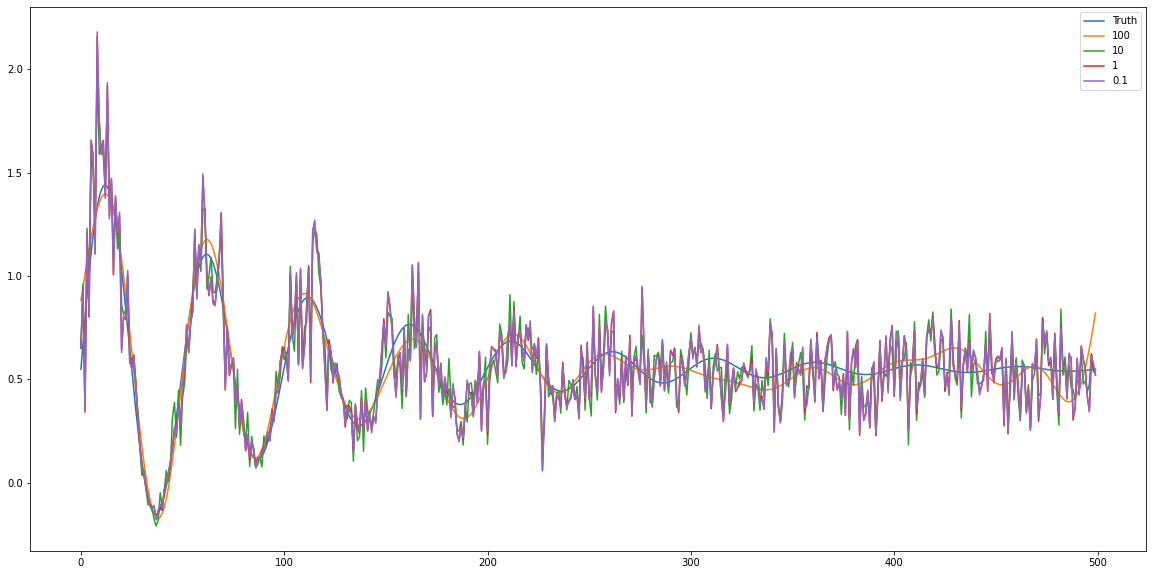

In [4]:
# compute the fourier transform
def clean_data_FFT(data, threshold):
    
    # compute fourier transform, get magnitude
    fft = np.fft.fft(data, len(data))
    magnitude = fft * np.conj(fft)
    
    # filter out small frequencies
    filter = magnitude > threshold
    fft = filter * fft
    
    clean = np.fft.ifft(fft)
    clean = clean.real
    
    return clean

fig, axs = plt.subplots(1, 1, figsize = (20, 10))
_ = axs.plot(values, label='Truth')
#_ = axs.plot(noisy_values, label='Noise')
_ = axs.plot(clean_data_FFT(noisy_values, 100), label='100')
_ = axs.plot(clean_data_FFT(noisy_values, 10), label='10')
_ = axs.plot(clean_data_FFT(noisy_values, 1), label='1')
_ = axs.plot(clean_data_FFT(noisy_values, 0.1), label='0.1')
#_ = axs.plot(clean_data_FFT(noisy_values, 0.01), label='0.01')
_ = axs.legend()